In [1]:
import pandas as pd
from trop_fns import *
from WDDD_class import *
from experiments import *
import seaborn as sns

# Shift Experiment

In [2]:
shift_descent_DF = pd.read_pickle("DataFrames/shift_descent_DF.pkl")

In [3]:
#log_error_shift_descent_DF = log_error(shift_descent_DF)
display(shift_descent_DF.groupby(['lr', 'N', 'M', 'grad'])['loss_values'].agg([('mean', 'mean')])['mean'].unstack(level=0).style.highlight_min(color = 'lightgreen', axis = 1))
# print(shift_descent_DF.groupby(['lr', 'N', 'M', 'grad'])['log_error'].agg([('mean', 'mean')])['mean'].str[-1].unstack(level=0).to_latex(float_format="%.3f"))
print("Total experiment time is: ", sum(shift_descent_DF['time_taken'])/60, " minutes." )
print("Average experiment time is: ", np.mean(shift_descent_DF['time_taken']), " seconds." )

Total experiment time is:  277.4567265272141  minutes.
Average experiment time is:  0.7006482993111466  seconds.


In [4]:
trained_lr_df = pd.DataFrame(shift_descent_DF[shift_descent_DF["grad"] == "TA"].groupby(['lr',
                                 'N', 'M', 
                                 ])['loss_values'].agg([('mean', 'mean')])['mean'].unstack(level=[1,2]).idxmin(), columns = ['lr'])

trained_lr_df.reset_index(inplace=True)

trained_lr_df.to_pickle("DataFrames/trained_lr_df.pkl")

In [5]:
shift_optimisation_DF = pd.read_pickle("DataFrames/shift_optimisation_DF.pkl")

In [6]:
#log_error(shift_optimisation_DF)
display(shift_optimisation_DF.groupby(['lr', 'grad'])['loss'].agg([('mean', 'mean')])['mean'].unstack(level=0).style.highlight_min(color = 'lightgreen', axis = 1))  
print("Total experiment time is: ", sum(shift_optimisation_DF['time_taken'])/60, " minutes" )
print("Average experiment time is: ", np.mean(shift_optimisation_DF['time_taken']), " seconds." )

lr,0.002479,0.006738,0.018316,0.049787,0.135335,0.367879,1.000000,2.718282,7.389056,20.085537,54.598150
grad,,,,,,,,,,,
CA,2.225039,1.728721,1.084939,1.072122,1.068103,1.069090,1.090667,1.198298,1.423777,1.915661,3.198239
CD,2.445482,2.274819,1.904893,1.379110,1.098181,1.080680,1.078148,1.073088,1.069272,1.132560,1.842252
TA,2.381499,2.107773,1.505747,1.067235,1.067045,1.062827,1.068045,1.105857,1.216398,1.612239,2.753009
TD,2.424943,2.214261,1.705550,1.159842,1.077053,1.072020,1.068045,1.063885,1.063824,1.164560,1.635349


Total experiment time is:  1462.1572195450465  minutes
Average experiment time is:  3.6923162109723395  seconds.


# Supp Experiments

In [7]:
supp_descent_DF = pd.read_pickle("DataFrames/supp_descent_DF.pkl")

In [8]:
#log_error_supp_descent_DF = log_error(supp_descent_DF)
display(supp_descent_DF.groupby(['scale', 'N', 'M', 'graph'])['loss_values'].agg([('mean', 'mean')])['mean'].unstack(level=0).style.highlight_min(color = 'lightgreen', axis = 1))
# print(supp_descent_DF.groupby(['scale', 'N', 'M', 'graph'])['log_error'].agg([('mean', 'mean')])['mean'].str[-1].unstack(level=0).to_latex(float_format="%.3f"))
print("Total experiment time is: ", sum(supp_descent_DF['time_taken'])/60, " minutes" )
print("Average experiment time is: ", np.mean(supp_descent_DF['time_taken']), " seconds." )

Total experiment time is:  428.4280750274658  minutes
Average experiment time is:  2.3801559723748102  seconds.


In [9]:
trained_scale_df = pd.DataFrame(supp_descent_DF[supp_descent_DF["graph"] == "incomp"].groupby(['scale',
                                 'N', 'M', 
                                 ])['loss_values'].agg([('mean', 'mean')])['mean'].unstack(level=[1,2]).idxmin(), columns = ["scale"])

trained_scale_df.reset_index(inplace=True)

trained_scale_df.to_pickle("DataFrames/trained_scale_df.pkl")

In [10]:
trained_scale_df = pd.read_pickle("DataFrames/trained_scale_df.pkl")
trained_lr_df = pd.read_pickle("DataFrames/trained_lr_df.pkl")

# Sim Data Distances

In [11]:
sim_data_DF = pd.read_pickle("DataFrames/sim_data_DF.pkl")

Average time taken: 2.9035140209727817  seconds


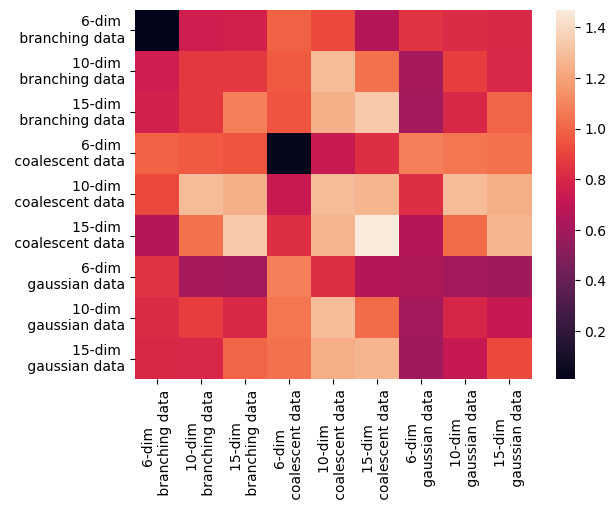

In [12]:
dataset_list = [[6, 'branching'], [10, 'branching'], [15, 'branching'],[6, 'coalescent'],[10, 'coalescent'],[15, 'coalescent']
                ,[6, 'gaussian'],[10, 'gaussian'],[15, 'gaussian']
               ]
M = np.zeros((len(dataset_list),len(dataset_list)))

for i in range(len(dataset_list)):
    for j in range(len(dataset_list)):
        
        N_i = dataset_list[i][0]
        type_i = dataset_list[i][1]
        N_j = dataset_list[j][0]
        type_j = dataset_list[j][1]
        
        if N_j <= N_i:
            dist = min(sim_data_DF[(sim_data_DF["N"] == N_i) & (sim_data_DF["N_data_type"] == type_i) & (sim_data_DF["M"] == N_j) & (sim_data_DF["M_data_type"] == type_j)]['loss_values'])

            M[i,j] = dist
            M[j,i] = dist
    
axes_labels = [f"{dataset[0]}-dim \n {dataset[1]} data" for dataset in dataset_list]

fig = sns.heatmap(M, xticklabels = axes_labels, yticklabels = axes_labels)

fig.figure.savefig("Figures/sim_data_heatmap.png", bbox_inches = 'tight')

print("Average time taken:", np.mean(sim_data_DF['time_taken']), " seconds")

# Real Data

In [13]:
real_data_DF = pd.read_pickle("DataFrames/real_data_DF.pkl")

Average time taken: 3.6644507727065645  seconds


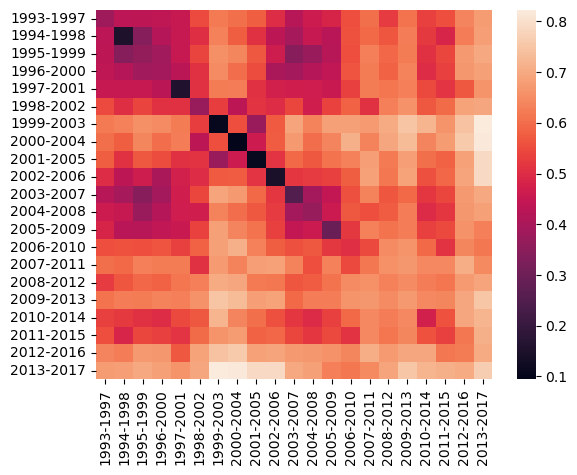

In [14]:
dataset_list = [str(n)+".npy" for n in range(1993, 2014)]
M = np.zeros((21,21))

for i in range(21):
    for j in range(i+1):
        
        dist = min(real_data_DF[(real_data_DF["high_datafile"] == dataset_list[j]) & (real_data_DF["low_datafile"] == dataset_list[i])]['loss_values'])

        M[i,j] = dist
        M[j,i] = dist

axes_labels = [str(n)+"-"+str(n+4) for n in range(1993, 2014)]

fig = sns.heatmap(M, xticklabels=axes_labels, yticklabels=axes_labels)

fig.figure.savefig("Figures/real_data_heatmap.png", bbox_inches = 'tight')

print("Average time taken:", np.mean(real_data_DF['time_taken']), " seconds")